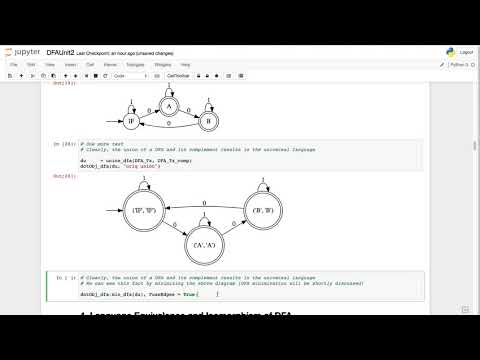

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('dGcLHtYLgDU')

In [ ]:
from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *

# Basic DFA Creation, Alphabet Expansion, Totalization

<span style="color:blue"> **We can now write routines to print DFA using dot. The main routines are listed below.** </span>

* dot_dfa_w_bh : lists all states of a DFA including black-hole states
* dot_dfa      : lists all isNotBH states (see below for a defn), i.e. suppress black-holes
     - Usually there are too many transitions to them and that clutters the view
     

In [ ]:
# Essential part of a DFA for even # of 0s

ev0 = md2mc('''
DFA
IF : 0 -> A
A  : 0 -> IF
''')

dotObj_dfa(ev0)

In [ ]:
# Expand the Sigma of this DFA by adding '1' to it

ev0_bh =  addtosigma_dfa(ev0, set({'1'}))

dotObj_dfa(ev0_bh)

In [ ]:
# Totalize this DFA so that the '1' moves land in a "black hole" state
ev0_bh_totalize = totalize_dfa(ev0_bh)

# But, viewing using dotObj_dfa still suppresses black-hole moves (reduces clutter)
dotObj_dfa(ev0_bh_totalize)

In [ ]:
# If you want to see all moves, display using dotObj_dfa_w_bh

dotObj_dfa_w_bh(ev0_bh_totalize)

In [ ]:
# For an even prettier depiction, set FuseEdges True so that multiple edges between the same states are fused

dotObj_dfa_w_bh(ev0_bh_totalize, FuseEdges=True)

# Basic DFA Tests Illustrated

We now illustrate some basic testing of consistency, language acceptance, etc

In [ ]:
# This is the DFA which accepts sequences of three 0's 
# (hence the name DFA_Tz -- for "three zeros")
# Arrival of 1's cause the machine to "idle" in the same state
#
# This corresponds to Figure 4.6 in the book

DFA_Tz = md2mc('''DFA
IF : 0 -> A
A  : 0 -> B
B  : 0 -> IF
IF : 1 -> IF
A  : 1 -> A
B  : 1 -> B''')


dotObj_dfa(DFA_Tz)

In [ ]:
# Some tests pertaining to totalize_dfa, is_consistent_dfa, etc
def tests_dfa_consist():
    """Some tests wrt DFA routines.
    """
    DFA_Tz_Q     = DFA_Tz["Q"]
    DFA_Tz_Sigma = DFA_Tz["Sigma"]
    randQ        = random.choice(list(DFA_Tz_Q))
    randSym      = random.choice(list(DFA_Tz_Sigma))

    DFA_Tz_deepcopy = copy.deepcopy(DFA_Tz)

    print('is_consistent_dfa(DFA_Tz) =', 
           is_consistent_dfa(DFA_Tz) )
    print('Removing mapping for ' + 
          "(" + randQ + "," + randSym + ")" + 
          "from DFA_Tz_deepcopy")
    DFA_Tz_deepcopy["Delta"].pop((randQ,randSym))
    print('is_consistent_dfa(DFA_Tz_deepcopy) =', 
         is_consistent_dfa(DFA_Tz_deepcopy) )

    totalized = totalize_dfa(DFA_Tz_deepcopy)
    print ( 'is_consistent_dfa(totalized) =', 
          is_consistent_dfa(totalized) )
    assert(totalized == totalize_dfa(totalized)) # Must pass  

tests_dfa_consist()

Let us test functions step_dfa, run_dfa, and accepts_dfa

In [ ]:
# Some tests of step, run, etc.

def step_run_accepts_tests():
    print("step_dfa(DFA_Tz, 'IF', '1') = ", 
          step_dfa(DFA_Tz, 'IF', '1'))
    print("step_dfa(DFA_Tz, 'A', '0') = ", 
          step_dfa(DFA_Tz, 'A', '0'))

    print("run_dfa(DFA_Tz, '101001') = ", 
          run_dfa(DFA_Tz, '101001'))
    print("run_dfa(DFA_Tz, '101000') = ", 
          run_dfa(DFA_Tz, '101000'))

    print("accepts_dfa(DFA_Tz, '101001') = ", 
          accepts_dfa(DFA_Tz, '101001')) 
    print("accepts_dfa(DFA_Tz, '101000') = ", 
          accepts_dfa(DFA_Tz, '101000')) 

step_run_accepts_tests()

# Boolean Operations on DFA

It is possible to take complements, union, and intersection of DFA.

The union of two DFA produces a new DFA such that its language is the language-union of the input DFA 
(and similarly for the other set operations also)

In [ ]:
dotObj_dfa(DFA_Tz, "DFA_Tz")

In [ ]:
# Run a complementation test

DFA_Tz_comp = comp_dfa(DFA_Tz)
dotObj_dfa(DFA_Tz_comp)

In [ ]:
# One more test
# Clearly, the union of a DFA and its complement results in the universal language

du     = union_dfa(DFA_Tz, DFA_Tz_comp)
dotObj_dfa(du, "orig union")

In [ ]:
# Clearly, the union of a DFA and its complement results in the universal language
# We can see this fact by minimizing the above diagram (DFA minimization will be shortly discussed)

dotObj_dfa(min_dfa(du), FuseEdges = True)

# Language Equivalence and Isomorphism of DFA

We will now illustrate ideas revolving around DFA language-equivalence and isomorphism


In [ ]:
# It is convenient to have a DFA that is an artificially bloated variant of one you've seen earlier...

Tz_bloated = md2mc('''DFA
IF : 0 -> A
A  : 0 -> B1
B  : 0 -> IF
IF : 1 -> IF
A  : 1 -> A1
B  : 1 -> B1
A1 : 0 -> B
A1 : 1 -> A
B1 : 0 -> IF
B1 : 1 -> B
''')

dotObj_dfa(Tz_bloated)


In [ ]:
help(langeq_dfa)
help(iso_dfa)

In [ ]:
# Are these DFA language-equivalent?
is_langeq = langeq_dfa(DFA_Tz, Tz_bloated, False)

# These DFA are language equivalent, but not isomorphic -- because one is bloated
is_iso = iso_dfa(DFA_Tz, Tz_bloated)

print('is language-equivalent:', is_langeq)
print('is isomorphic:', is_iso)

In [ ]:
# By minimizing, we know what the bloated DFA corresponds to. Looks familiar?

dotObj_dfa(min_dfa(Tz_bloated), FuseEdges = True)

In [ ]:
# We create a DFA that is a badly bloated variant of Tz_bloated

Tz_badBloat = md2mc('''DFA
IF : 0 -> A
A  : 0 -> B1
B  : 0 -> IF
IF : 1 -> IF
A  : 1 -> A1
B  : 1 -> IF
A1 : 0 -> B
A1 : 1 -> A
B1 : 0 -> IF
B1 : 1 -> B
''')
dotObj_dfa(Tz_badBloat, FuseEdges=True)

In [ ]:
# We minimize the badly bloated DFA and the minimized DFA does not look like Tz_bloated
# This itself suggests that we did not bloat it right

dotObj_dfa(min_dfa(Tz_badBloat), FuseEdges = True)

In [ ]:
# If we apply language equivalence, we find out how these DFAs differ (why they are not language-equivalent)
# Providing "True" as the last argument results in one example of a difference being printed

langeq_dfa(DFA_Tz, Tz_badBloat, True)

In [ ]:
# If you don't want to see the counterexample, supply "False" as the last argument
langeq_dfa(DFA_Tz, Tz_badBloat, False)

In [ ]:
# Clearly, DFAs that are not language equivalent are not isomorphic either
iso_dfa(DFA_Tz, Tz_badBloat)

## One more test, now illustrating intersection, union, isomorphism

In [ ]:
DFA_Tzv1 = md2mc('''DFA
IF : 0 -> A
A  : 0 -> B
B  : 0 -> IF
IF : 1 -> IF
A  : 1 -> B
B  : 1 -> B''')

dotObj_dfa(DFA_Tzv1)

In [ ]:
IntDFA = intersect_dfa(DFA_Tzv1, DFA_Tz)
dotObj_dfa(IntDFA)

In [ ]:
dotObj_dfa(min_dfa(IntDFA))

In [ ]:
UnionDFA = union_dfa(DFA_Tzv1, DFA_Tz)
dotObj_dfa(UnionDFA)

In [ ]:
# We did not expect the union and intersection to be isomorphic, and nor are they

iso_dfa(IntDFA, UnionDFA)

## Counterexample trace generation

In [ ]:
# Neither are the union and intersection language-equivalent

langeq_dfa(IntDFA, UnionDFA, True)

# DFA minimization

## A first simple example

<font size="4"> 


```


Consider this DFA as an example
--------------------------------
 
DFA
IF : 0 -> A    IF : 1 -> IF
A  : 0 -> B1   A  : 1 -> A1
B  : 0 -> IF   B  : 1 -> B1
A1 : 0 -> B    A1 : 1 -> A
B1 : 0 -> IF   B1 : 1 -> B


This is the initial display of a matrix (only the lower half shown, as the upper half is symmetric). The matrix shows "." which are points at which state pairs "collide." The dots in this figure allow for these pairs to collide (we show pairs only one way, i.e. (P,Q) and not the other way i.e. (Q,P) also).


A   .

A1  .   .

B   .   .   .

B1  .   .   .   .

    IF  A   A1  B
    
    
The above is a convenient arrangement to talk about these pairs:


(A, IF),

(A1, IF), (A1, A)

(B, IF),  (B, A),  (B, A1)

(B1, IF), (B1, A), (B1, A1), (B1, B)

Now, here is how the computation proceeds for this example:
===========================================================

Frame-0              Frame-1                Frame-2                
 
A   -1                A   0                  A   0                 

A1  -1   -1           A1  0   -1             A1  0   -1            
 
B   -1   -1  -1       B   0   -1   -1        B   0   1   1         

B1  -1   -1  -1  -1   B1  0   -1   -1  -1    B1  0   1   1   -1    

    IF   A   A1  B        IF  A    A1  B         IF  A   A1  B         
    
    
Frame-3 = Frame-2   

A   0 

A1  0   -1

B   0   1   1

B1  0   1   1   -1

    IF  A   A1  B   
``` 

 

</font>


__Now, given that there are no changes, we can form equivalence-classes of states__

1. A and A1 are in the same equivalence class

2. B and B1 are in the same equivalence class

3. No overlap between the equivalence classes. So we are done:

  a. Choose a representative (e.g., A) for {A,A1}
  
  b. Choose a representative (e.g., B) for {B,B1}

## A more elaborate example of DFA minimization

In [ ]:
bloated_dfa = md2mc('''
DFA
IS1 : a -> FS2
IS1 : b -> FS3
FS2 : a -> S4
FS2 : b -> S5
FS3 : a -> S5
FS3 : b -> S4
S4  : a | b -> FS6
S5  : a | b -> FS6
FS6 : a | b -> FS6
''')
dotObj_dfa(bloated_dfa)


Now, here is how the computation proceeds for this example:
-------------------------------------------------------- 
 
 <br>
 
<font size="3"> 


```
 
Frame-0                     Frame-1                   Frame-2                    
                                                                                                     
FS2 -1                      FS2  0                   FS2   0                     

FS3 -1  -1                  FS3  0  -1               FS3   0  -1                 

S4  -1  -1  -1              S4  -1   0   0            S4   2   0   0             

S5  -1  -1  -1  -1          S5  -1   0   0  -1        S5   2   0   0  -1         

FS6 -1  -1  -1  -1  -1      FS6  0  -1  -1   0   0   FS6   0   1   1   0   0     

    IS1 FS2 FS3 S4  S5          IS1 FS2 FS3 S4  S5        IS1 IS2 FS3 S4  S5        

Initial                  0-distinguishable         1-distinguishable                         
     
     
Frame-3                 Frame-4     
                        =
                        Frame-3

FS2  0

FS3  0  -1

S4   2   0   0

S5   2   0   0  -1

FS6  0   1   1   0   0

    IS1 IS2 FS3  S4  S5
    
2-distinguishable 
     
```
</font>

Here is the algorithm, going frame by frame.

- Initial Frame: 

     The initial frame is drawn to clash all _combinations_ of states taken two at a time.
     Since we have 6 states, we have $6\choose 2$ = $15$ entries. We put a -1 against each
     such pair to denote that they have not been found distinguishable yet.

- Frame *0-distinguishable*: We now put a 0 where a pair of states is 0-distinguishable. This means the states are distinguisable after consuming $\varepsilon$. This of course means that the states are themselves distinguishable. This is only possible if one is a final state and the other is not (in that case, one state, after consuming $\varepsilon$ accepts_dfa, and another state after consuming $\varepsilon$ does not accept.

  - So for instance, notice that (FS3,IS1) and (S4,FS2) are 0-distinguishable, meaning that one is a final and the other is a non-final state.

- Frame *1-distinguishable*: We now put a 1 where a pair of states is 1-distinguishable. This means the states are distinguisable after consuming a string of length $1$ (a single symbol). This is only possible if one state transitions to a final state and the other transitions to a non-final state after consuming a member of $\Sigma$. 

  State pairs (FS6,FS2) and (FS6,FS3) are of this kind. While both FS6 and FS2 are final states (hence _0-indistinguishable_), after consuming an 'a' (or a 'b') they respectively go to a final/non-final state.
 This means that

  - after processing **the same symbol** one state -- let's say pre_p -- finds itself landing in a state p and another state  -- let's say pre_q -- finds itself landing in a state q such that (p,q) is 0-distinguishable.
  
  - When this happens, states pre-p and pre-q are **1-distinguishable**.

- Frame *2-distinguishable*: We now put a 2 where a pair of states is 2-distinguishable. This means the states are distinguisable after consuming a string of length $2$ (a string of length $2$). This is only possible if one state transitions to a state (say p) and the other transitions to state (say q) after consuming a member of $\Sigma$ such that (p,q) is **1-distinguishable**. State pairs (S5,IS1) and (S4,IS1) are 2-distinguishable because

  - after processing **the same symbol** one state -- let's say pre_p -- finds itself landing in a state p and another state  -- let's say pre_q -- finds itself landing in a state q such that (p,q) is 0-distinguishable.
  
  - When this happens, states pre-p and pre-q are **1-distinguishable**.
  
  - One example is this:
  
    - S5 and IS1 are 2-distinguishable.
    
    - This is because after seeing an 'aa', IS1 lands in a non-final state while S5 lands in a final state
    
    - Observe that "aa" = "a" + "a" . Thus, after eating the first "a", IS1 lands in S2 while S5 lands in FS6, and (S2,FS6) have already been deemed 1-distinguishable.
    
    - Thus, when we mark (S5,IS1) as 2-distinguishable, we are sending the matrix entry at (S5,IS1) from 
      -1 to 2
 


  - Now, in search of 3-distinguishability, we catch hold of all pairs in the matrix and see if we can send another -1 entry to "3". This appears not to happen. 
  
     - Thus, if (FS2,FS3) is pushed via any sequence of symbols (any string) of any length, it
       always stays in the same type of state. Thus, after seeing 'ababba', FS2 is in S6, while FS3 
        is also in FS6.


 - Thus, given no changes in the matrix, we stop.
 
 
__Now the equivalence classes are formed as follows:__

 
 * FS2 and FS3 in one equivalence class
 
 * S4 and S5 in another
 
 An example where equivalence-classes themselves are to be merged should be fun to try.

In [ ]:
# Results of minimizing the bloated DFA
dotObj_dfa(min_dfa(bloated_dfa), FuseEdges=True, dfaName="shrunkbloated_dfa")

__Another fun DFA called "The blimp" :-) __

In [ ]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')
dblimp = dotObj_dfa(blimp)
dblimp

In [ ]:
dblimp = dotObj_dfa(blimp, FuseEdges=True)
dblimp

In [ ]:
mblimp = min_dfa(blimp)
dmblimp = dotObj_dfa(mblimp, FuseEdges=True)
dmblimp

# Illustration of DeMorgan's Law on DFA

This is an extensive illustration of union, intersection and complementation, DFA minimization, isomorphism test, language equivalence test, and an application of DeMorgan's law

Here is how our construction proceeds:

* First we construct dfaOdd1s

* Then we construct ends0101

* Then obtain odd1sORends0101

* Then minimize as per Minodd1sORends0101 = min_dfa(odd1sORends0101)

* Check if isomorphism exists via iso_dfa(odd1sORends0101, Minodd1sORends0101)  (should not)

* Check and confirm via langeq_dfa(odd1sORends0101, Minodd1sORends0101)  (should hold)

* Then obtain intersection odd1sANDends0101 = intersect_dfa(dfaOdd1s,ends0101)

* Then minimize via Minodd1sANDends0101 = min_dfa(odd1sANDends0101)

* Then complement via CdfaOdd1s = comp_dfa(dfaOdd1s)

* Then complement the other DFA via Cends0101 = comp_dfa(ends0101)

* Now take complement of union via C_CdfaOdd1sORCends0101 = comp_dfa(union_dfa(CdfaOdd1s, Cends0101))

* Now minimize via MinC_CdfaOdd1sORCends0101 = min_dfa(C_CdfaOdd1sORCends0101)

* Now isomorphism holds via iso_dfa(MinC_CdfaOdd1sORCends0101, Minodd1sANDends0101)

In [ ]:
dfaOdd1s = md2mc('''
DFA
I : 0 -> I
I : 1 -> F
F : 0 -> F 
F : 1 -> I
''')

dotObj_dfa(dfaOdd1s)

In [ ]:
ends0101 = md2mc('''
DFA 
I     : 0 -> S0  
I     : 1 -> I 
S0    : 0 -> S0 
S0    : 1 -> S01 
S01   : 0 -> S010 
S01   : 1 -> I 
S010  : 0 -> S0 
S010  : 1 -> F0101 
F0101 : 0 -> S010 
F0101 : 1 -> I 
''')

dotObj_dfa(ends0101)

In [ ]:
odd1sORends0101 = union_dfa(dfaOdd1s,ends0101)
dotObj_dfa(odd1sORends0101)

In [ ]:
Minodd1sORends0101 = min_dfa(odd1sORends0101)
dotObj_dfa(Minodd1sORends0101)

In [ ]:
iso_dfa(odd1sORends0101, Minodd1sORends0101)

In [ ]:
langeq_dfa(odd1sORends0101, Minodd1sORends0101)

In [ ]:
odd1sANDends0101 = intersect_dfa(dfaOdd1s,ends0101)
dotObj_dfa(odd1sANDends0101)

In [ ]:
Minodd1sANDends0101 = min_dfa(odd1sANDends0101)
dotObj_dfa(Minodd1sANDends0101)

In [ ]:
CdfaOdd1s = comp_dfa(dfaOdd1s)
Cends0101 = comp_dfa(ends0101)
C_CdfaOdd1sORCends0101 = comp_dfa(union_dfa(CdfaOdd1s, Cends0101))
dotObj_dfa(C_CdfaOdd1sORCends0101)

In [ ]:
MinC_CdfaOdd1sORCends0101 = min_dfa(C_CdfaOdd1sORCends0101)
dotObj_dfa(MinC_CdfaOdd1sORCends0101)

In [ ]:
# This is where DeMorgan's Law is shown in its full glory!!

iso_dfa(MinC_CdfaOdd1sORCends0101, Minodd1sANDends0101)